In [19]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from typing import Tuple

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

import numpy as np
def parse_fragout(file: Path) -> pd.DataFrame:
    out = []
    with file.open() as f:
        for line in f:
            row = np.zeros(len(line), dtype=np.int8)
            for i, char in enumerate(line[:-1]):
                row[i] = int(char)
            out.append(row)
    out = np.array(out)
    return pd.DataFrame(out)


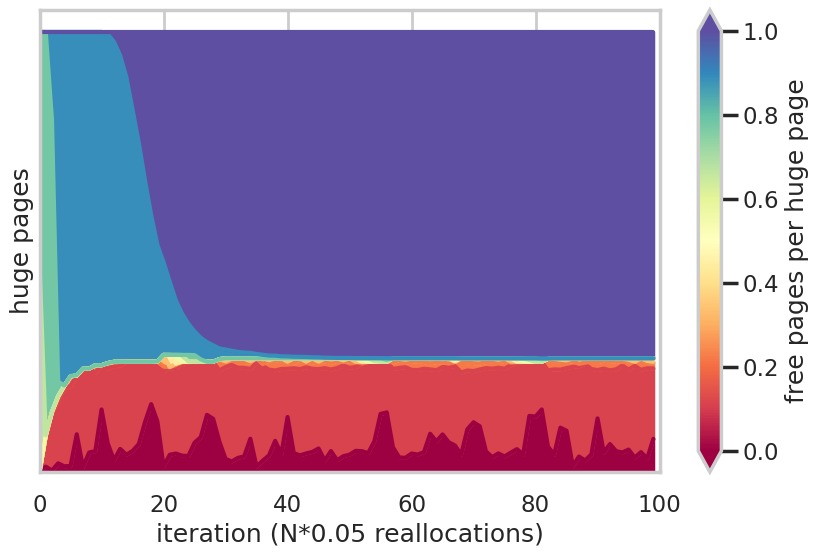

In [30]:
data = parse_fragout(Path("frag-c.txt"))
per_huge = data[[*data.columns[2:]]]
buckets = per_huge.apply(pd.value_counts, axis=1).fillna(0)

fix, ax = plt.subplots()
fix.set_figwidth(10)
fix.set_figheight(6)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

buckets.plot.area(ax=ax, xlim=(0, 100), xlabel="iteration (N*0.05 reallocations)",
               ylabel="huge pages", yticks=[], legend=False, colormap=cmap)
plt.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, extend="both",
             label="free pages per huge page")

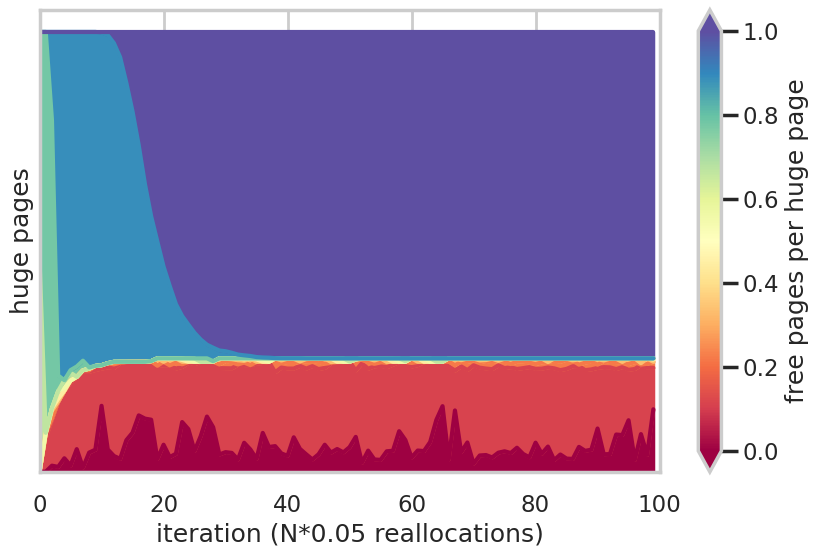

In [31]:
data = parse_fragout(Path("frag-l.txt"))
per_huge = data[[*data.columns[2:]]]
buckets = per_huge.apply(pd.value_counts, axis=1).fillna(0)

fix, ax = plt.subplots()
fix.set_figwidth(10)
fix.set_figheight(6)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

buckets.plot.area(ax=ax, xlim=(0, 100), xlabel="iteration (N*0.05 reallocations)",
               ylabel="huge pages", yticks=[], legend=False, colormap=cmap)
plt.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, extend="both",
             label="free pages per huge page")

[Text(0.5, 81.91666666666664, 'iteration')]

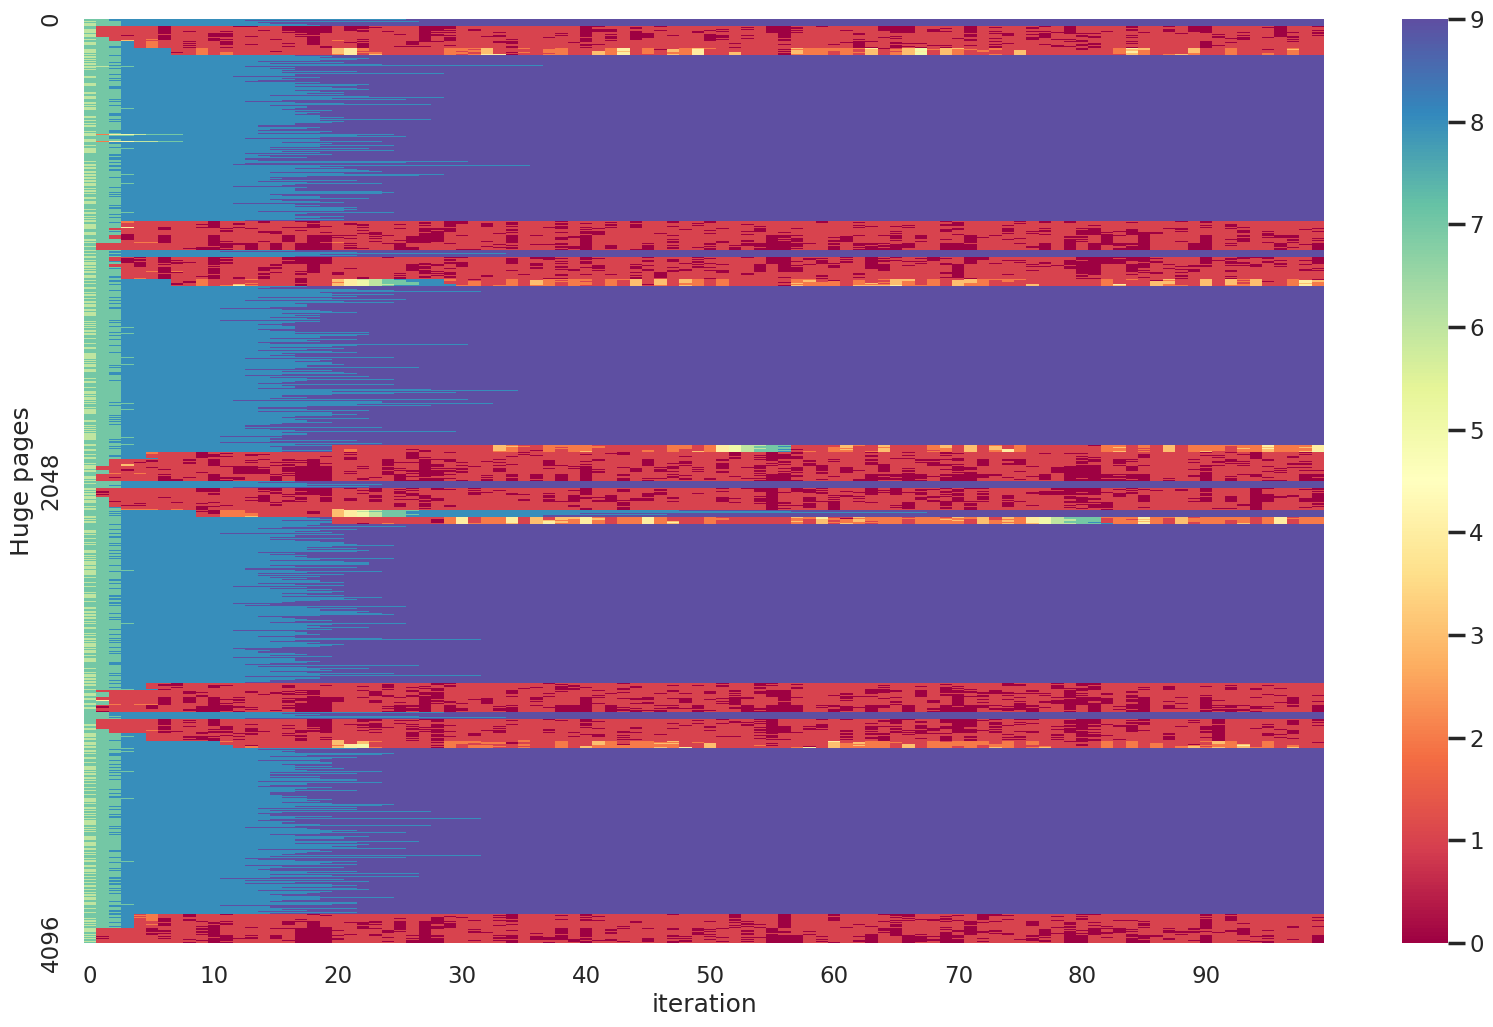

In [32]:
# Heatmap Array
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(12)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

data = parse_fragout(Path("frag-c.txt"))
per_huge = data.T

plot = sns.heatmap(per_huge, ax=ax, cmap=cmap,
                   yticklabels=2*1024, xticklabels=10)
plot.set(ylabel="Huge pages")
plot.set(xlabel="iteration")


[Text(0.5, 81.91666666666664, 'iteration')]

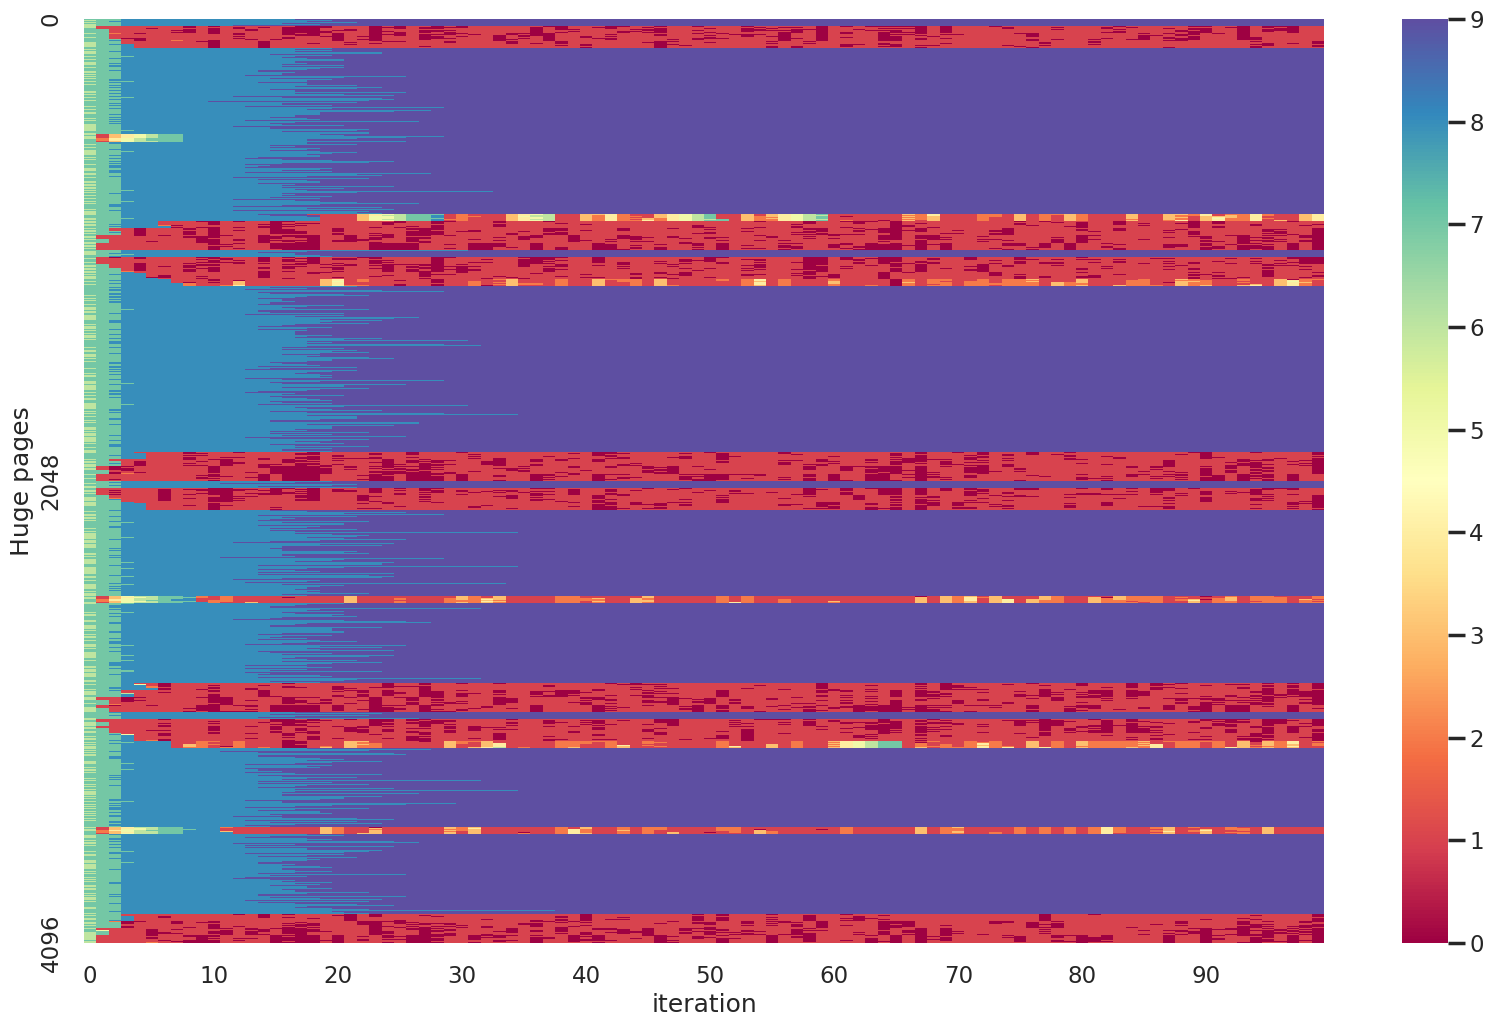

In [33]:
# Heatmap Array
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(12)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

data = parse_fragout(Path("frag-l.txt"))
per_huge = data.T

plot = sns.heatmap(per_huge, ax=ax, cmap=cmap,
                   yticklabels=2*1024, xticklabels=10)
plot.set(ylabel="Huge pages")
plot.set(xlabel="iteration")


86037 21 4097.0


[Text(0.5, 81.91666666666664, 'iteration')]

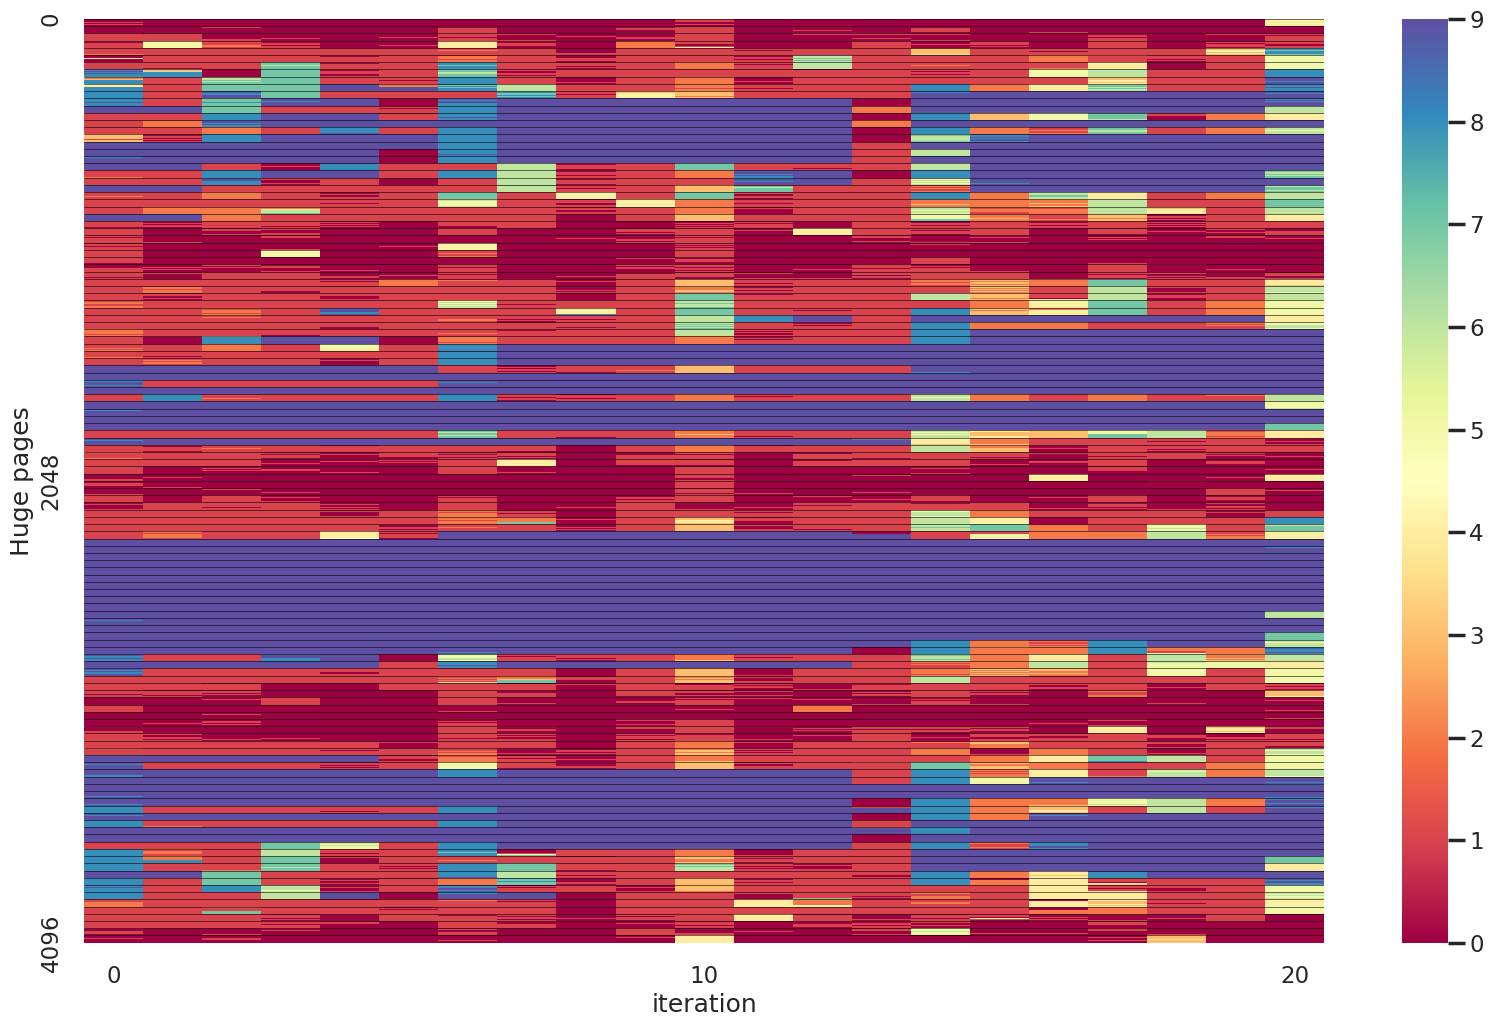

In [29]:
# Heatmap Array
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(12)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

data = parse_fragout(Path("stress-l.txt"))
per_huge = data.T
print(per_huge.size, per_huge.columns.size, per_huge.size / per_huge.columns.size)
huge_pages = per_huge.size // per_huge.columns.size

plot = sns.heatmap(per_huge, ax=ax, cmap=cmap,
                   yticklabels=2*1024, xticklabels=10)
plot.hlines(list(range(0, huge_pages, 32)), 0, per_huge.columns.size, colors="black", linewidth=0.4)
plot.set(ylabel="Huge pages")
plot.set(xlabel="iteration")

86037 21 4097.0


[Text(0.5, 81.91666666666664, 'iteration')]

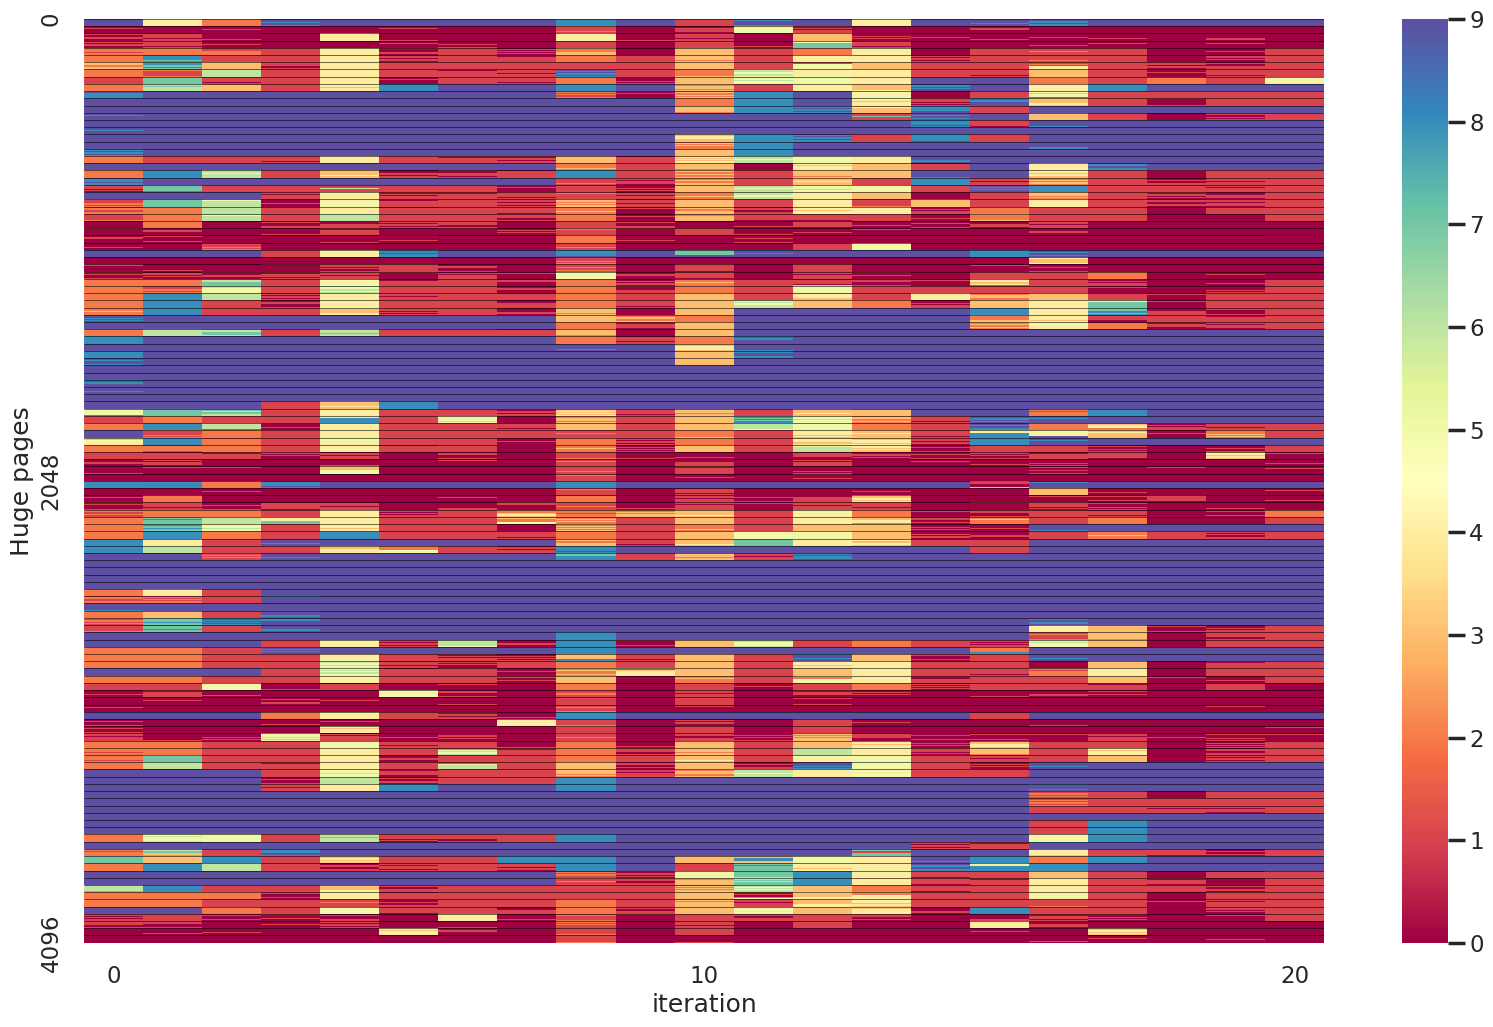

In [28]:
# Heatmap Array
fix, ax = plt.subplots()
fix.set_figwidth(20)
fix.set_figheight(12)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

data = parse_fragout(Path("stress-c.txt"))
per_huge = data.T
print(per_huge.size, per_huge.columns.size, per_huge.size / per_huge.columns.size)
huge_pages = per_huge.size // per_huge.columns.size

plot = sns.heatmap(per_huge, ax=ax, cmap=cmap,
                   yticklabels=2*1024, xticklabels=10)
plot.hlines(list(range(0, huge_pages, 32)), 0, per_huge.columns.size, colors="black", linewidth=0.4)
plot.set(ylabel="Huge pages")
plot.set(xlabel="iteration")

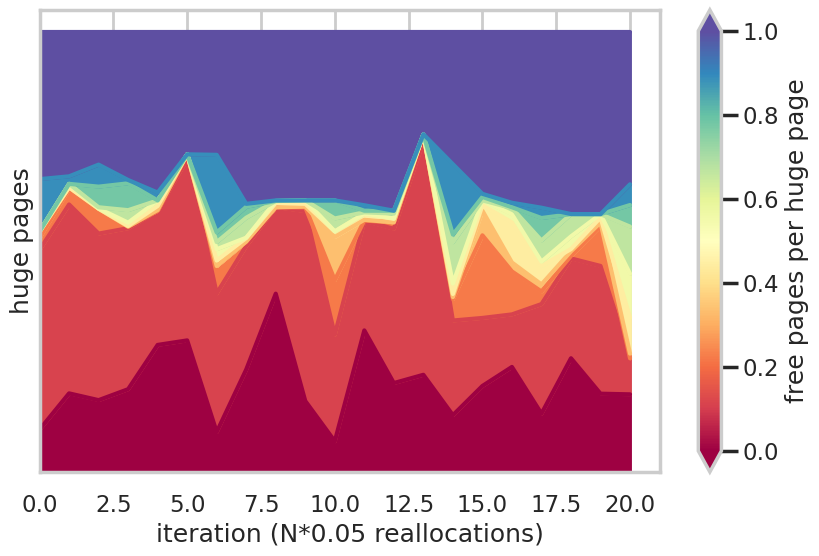

In [26]:
data = parse_fragout(Path("stress-l.txt"))
per_huge = data[[*data.columns[2:]]]
buckets = per_huge.apply(pd.value_counts, axis=1).fillna(0)

fix, ax = plt.subplots()
fix.set_figwidth(10)
fix.set_figheight(6)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

buckets.plot.area(ax=ax, xlim=(0, None), xlabel="iteration (N*0.05 reallocations)",
               ylabel="huge pages", yticks=[], legend=False, colormap=cmap)
plt.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, extend="both",
             label="free pages per huge page")

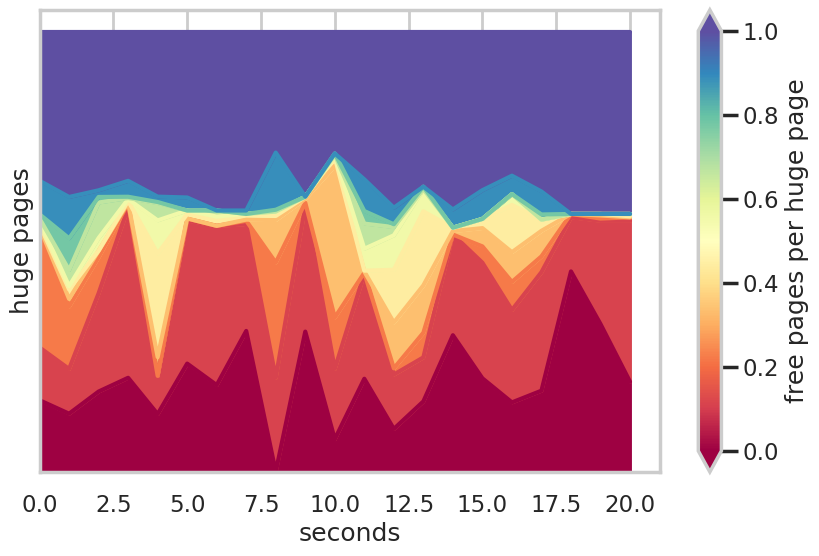

In [27]:
data = parse_fragout(Path("stress-c.txt"))
per_huge = data[[*data.columns[2:]]]
buckets = per_huge.apply(pd.value_counts, axis=1).fillna(0)

fix, ax = plt.subplots()
fix.set_figwidth(10)
fix.set_figheight(6)
fix.set_facecolor("white")

cmap = sns.color_palette("Spectral", as_cmap=True, n_colors=10)

buckets.plot.area(ax=ax, xlim=(0, None), xlabel="seconds",
               ylabel="huge pages", yticks=[], legend=False, colormap=cmap)
plt.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, extend="both",
             label="free pages per huge page")